In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/kaggle_Advance_house_prediction/houseprice.csv', usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage","Street",
                                            "YearBuilt", "LotShape", "1stFlrSF", "LotArea", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
  print("Column name {} and unique values are {}".format(i, len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2025

In [8]:
df["Total years"] = datetime.datetime.now().year - df['YearBuilt']

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,25


In [10]:
df.drop('YearBuilt', axis=1, inplace=True)


In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,25


In [12]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total years'],
      dtype='object')

# Creating Categorical Features

In [13]:
### Creating Categorical Features
cat_features = ['MSSubClass', "MSZoning", "Street", "LotShape"]
out_feature = ["SalePrice"]

In [14]:
from sklearn.preprocessing import LabelEncoder
le = {}
le["MSSubClass"] = LabelEncoder()
le["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [15]:
le

{'MSSubClass': LabelEncoder()}

In [16]:
for feature in cat_features:
  le[feature] = LabelEncoder()
  df[feature] = le[feature].fit_transform(df[feature])

In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25


In [18]:
### Stacking and Converting Into TTensors
import numpy as np
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [19]:
### convert numpy to tensors
import torch
cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

# Creating Continuous Features

In [20]:
cont_features = []
for i in df.columns:
  if i in ['MSSubClass', "MSZoning", "Street", "LotShape", "SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total years']

In [22]:
### Stacking and Converting Into TTensors
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [23]:
cont_values.dtype

torch.float32

**dependent feature**

In [24]:
y = torch.tensor(df[['SalePrice']].values, dtype=torch.float)

In [25]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [27]:
cat_features.shape, cont_values.shape, y.shape


(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [28]:
df.shape

(1201, 10)

# Embedding

In [29]:
len(df['MSSubClass'].unique())

15

In [30]:
cat_dims = [len(df[col].unique()) for col in ['MSSubClass', "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

**Thumb Rule:**<br>

Output Dimension Should be a set based on the input dimension (min(50, feature dimension/2))

In [31]:
embedding_dims = [(x, min(50, (x+1) // 2)) for x in cat_dims]
embedding_dims

[(15, 8), (5, 3), (2, 1), (4, 2)]

**Embedding Layer**

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp, out, in embedding_dims])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [34]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [35]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [36]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))

In [37]:
embedding_val

[tensor([[-2.3317,  0.6959,  0.7135,  ...,  0.4456, -1.0191,  1.0842],
         [-0.1938, -0.2172,  1.5578,  ..., -0.7592, -1.1244, -0.3371],
         [-2.3317,  0.6959,  0.7135,  ...,  0.4456, -1.0191,  1.0842],
         ...,
         [-0.4946, -0.2203, -1.5242,  ...,  1.0954,  0.2285, -0.0087],
         [-0.1938, -0.2172,  1.5578,  ..., -0.7592, -1.1244, -0.3371],
         [-0.1938, -0.2172,  1.5578,  ..., -0.7592, -1.1244, -0.3371]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.0919, -0.0285, -1.6098],
         [ 0.0919, -0.0285, -1.6098],
         [ 0.0919, -0.0285, -1.6098],
         ...,
         [ 0.0919, -0.0285, -1.6098],
         [ 0.0919, -0.0285, -1.6098],
         [ 0.0919, -0.0285, -1.6098]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4924],
         [-0.4924],
         [-0.4924],
         ...,
         [-0.4924],
         [-0.4924],
         [-0.4924]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.5046, -0.9896],
         [ 1.5046, -0.9896],
         [ 1.0037, -1.

In [38]:
z = torch.cat(embedding_val, 1)
z

tensor([[-2.3317,  0.6959,  0.7135,  ..., -0.4924,  1.5046, -0.9896],
        [-0.1938, -0.2172,  1.5578,  ..., -0.4924,  1.5046, -0.9896],
        [-2.3317,  0.6959,  0.7135,  ..., -0.4924,  1.0037, -1.0476],
        ...,
        [-0.4946, -0.2203, -1.5242,  ..., -0.4924,  1.5046, -0.9896],
        [-0.1938, -0.2172,  1.5578,  ..., -0.4924,  1.5046, -0.9896],
        [-0.1938, -0.2172,  1.5578,  ..., -0.4924,  1.5046, -0.9896]],
       grad_fn=<CatBackward0>)

**dropout layer**

In [39]:
droput = nn.Dropout(0.4)
final_embed = droput(z)
final_embed

tensor([[-3.8862,  1.1598,  1.1891,  ..., -0.8207,  2.5077, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ..., -0.8207,  2.5077, -0.0000],
        [-0.0000,  1.1598,  0.0000,  ..., -0.8207,  1.6729, -1.7460],
        ...,
        [-0.0000, -0.3672, -0.0000,  ..., -0.8207,  2.5077, -1.6493],
        [-0.0000, -0.0000,  2.5964,  ..., -0.0000,  2.5077, -1.6493],
        [-0.0000, -0.0000,  2.5964,  ..., -0.8207,  2.5077, -0.0000]],
       grad_fn=<MulBackward0>)

# Create a Feed Forward Neural Nerwark

In [46]:
class FeedForwardNN(nn.Module):

  def __init__(self, embedding_dims, n_cont, out_sz, layers, p=0.5):
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp,out in embedding_dims])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb = sum((out for inp,out in embedding_dims))
    n_in = n_emb + n_cont

    for i in layers:
      layerlist.append((nn.Linear(n_in, i)))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i

    layerlist.append(nn.Linear(layers[-1], out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cat, x_cont)                             :
    embeddings = []
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont], 1)
    x = self.layers(x)
    return x


In [47]:
len(cont_features)

5

In [48]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dims, len(cont_features),1,[100,50],p=0.4)

In [49]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

**Define Loss and Optimizer**

In [50]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [52]:
df.shape

(1201, 10)

In [53]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [54]:
cont_values.shape

torch.Size([1201, 5])

**Train Test Split**

In [55]:
batch_size = 1200
test_size = int(batch_size * 0.15)

cat_train = cat_features[:batch_size-test_size]
cat_test = cat_features[batch_size-test_size:batch_size]
cont_train = cont_values[:batch_size-test_size]
cont_test = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [58]:
len(cat_train),len(cat_test), len(cont_train), len(cont_test), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [60]:
epochs = 5000
final_losses = []
for i in range(epochs):
  i=i+1
  y_pred = model(cat_train, cont_train)
  loss = torch.sqrt(loss_function(y_pred, y_train))
  final_losses.append(loss)

  if i%10 == 1:
    print("Epoch number: {} and the loss: {}".format(i,loss.item()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss: 200496.78125
Epoch number: 11 and the loss: 200493.625
Epoch number: 21 and the loss: 200489.015625
Epoch number: 31 and the loss: 200482.515625
Epoch number: 41 and the loss: 200473.6875
Epoch number: 51 and the loss: 200461.859375
Epoch number: 61 and the loss: 200447.15625
Epoch number: 71 and the loss: 200428.5
Epoch number: 81 and the loss: 200407.375
Epoch number: 91 and the loss: 200383.71875
Epoch number: 101 and the loss: 200354.078125
Epoch number: 111 and the loss: 200324.1875
Epoch number: 121 and the loss: 200290.203125
Epoch number: 131 and the loss: 200251.0
Epoch number: 141 and the loss: 200207.5625
Epoch number: 151 and the loss: 200157.40625
Epoch number: 161 and the loss: 200114.875
Epoch number: 171 and the loss: 200067.375
Epoch number: 181 and the loss: 200002.46875
Epoch number: 191 and the loss: 199940.109375
Epoch number: 201 and the loss: 199873.203125
Epoch number: 211 and the loss: 199814.03125
Epoch number: 221 and the loss: 1

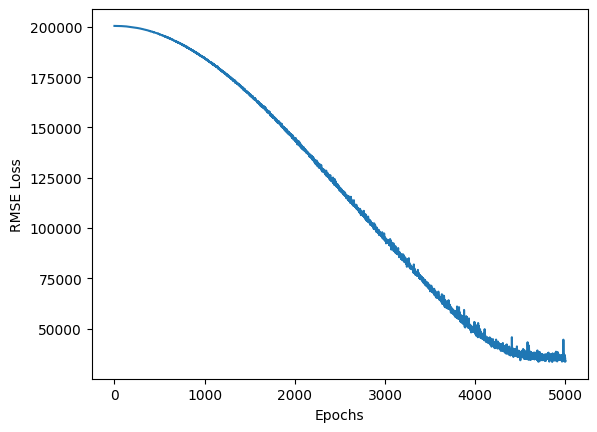

In [63]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), [loss.detach().numpy() for loss in final_losses])
plt.xlabel('Epochs')
plt.ylabel('RMSE Loss');

# Validate Test Data

In [64]:
y_pred = ""
with torch.no_grad():
  y_pred = model(cat_test, cont_test)
  loss = torch.sqrt(loss_function(y_pred, y_test))
  print('RMSE: {}'.format(loss))

RMSE: 47265.88671875


In [65]:
data_verify = pd.DataFrame(y_test.tolist(), columns=["Test"])
data_predicted = pd.DataFrame(y_pred.tolist(), columns=["Prediction"])